# Poisson distribution
Recall the formula:
$$
P\left(X = k|{\color{red}{\lambda}}\right) = \frac{e^{-{\color{red}{\lambda}}}{\color{red}{\lambda}}^k}{k!}
$$ 
that calculates the probability of occurrence of $k=0,1,\ldots$ events (photons arrivals, for instance) if the mean number of that events is ${\color{red}{\lambda}}$.

In [84]:
from matplotlib.pyplot import hist, show, title, legend
from numpy.random import poisson, randint
from numpy import sqrt, ones

## Mathemagically... # https://en.wikipedia.org/wiki/Anscombe_transform and https://en.wikipedia.org/wiki/Anscombe_transform#Inversion
anscombe = lambda p: 2 * sqrt(p + .375)
inverse = lambda x: (0.25) * x**2 - 1/8 + (0.25 * sqrt(3/2)) * x**(-1) - (11/8) * x**(-2) + (5/8) * sqrt(3/2) * x **(-3)

freeman_tukey = lambda p: 2 * sqrt(p + 1) - sqrt(p)

## Anscombe $\circ$ Poisson $\approx$ Gauss
Recall now that for a Poissonian r.v. $X$ we have:
$$E(X) = var(X) = {\color{red}{\lambda}}$$
And that the Anscombe's transform 
$$ X \rightarrow 2\sqrt{X + \frac{3}{8}}$$
turns it into (approximately) Gaussian one with a **constant** (and **known**!) variance, $var(X) = {\color{red}1}$.

There is also an exact **unbiased** formula for the inverse Anscombe:
$$
X \rightarrow \frac{X^2 - \frac{1}{2} + \sqrt{\frac{3}{2}}X^{-1} - \frac{11}{2}X^{-2} + 5\sqrt{\frac{3}{8}}X^{-3}}{4}
$$

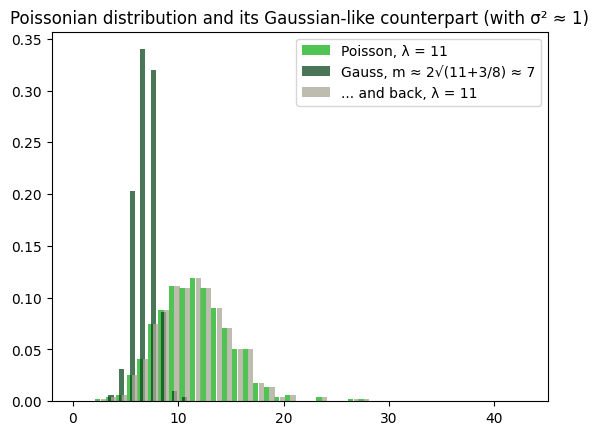

In [100]:
λ, N = randint(0b10, 0x10), 0o1000
Λ = λ * ones(N)

P = poisson(Λ)
G = anscombe(P)
#FT = freeman_tukey(P) # Nice bu not "GCN-super nice"
I = inverse(G)

_ = (hist((P, G,
           #FT,
           I), range(λ << 0b10), density = True, width = .5, color = ['xkcd:green', 'xkcd:pine green',
                                                                                # 'xkcd: green" ''',
                                                                                'xkcd:greyish'], alpha = .75),
     title(f'Poissonian distribution and its Gaussian-like counterpart (with σ² ≈ 1)'),
     legend((f'Poisson, λ = {λ}', f'Gauss, m ≈ 2√({λ}+3/8) ≈ {anscombe(λ):,.0f}',
             #f'Freeman-Tukey, m = {freeman_tukey(λ):,.0f},'
             f'... and back, λ = {λ}'), loc = 'upper right'))
show()

From the so called $3\sigma$ rule we can easily infer that the histogram of our now-almost-Gaussian r.v. has about six-seven **visible** bars...  